# 6510405750 ภูมิระพี เสริญวณิชกุล

In [129]:
import pandas as pd
import seaborn as sns

# 1. เปิดไฟล์ players.csv ขึ้นมาเพื่อใช้ในแบบฝึกหัดนี้ (อย่าลืมตัดคอลัมน์ว่างออกด้วย) จากนั้นให้หารค่าในคอลัมน์ shots, passes, tackles, และ saves ด้วยจำนวนนาทีของผู้เล่นคนนั้น เพื่อการเปรียบเทียบที่เท่าเทียมกัน และทำให้ตำแหน่ง (position) เป็น Category ที่เรียงลำดับจาก goalkeeper, defender, midfielder, forward

In [130]:
players_df = pd.read_csv('./data/players.csv').dropna(axis=1, how='all') # axis is 1 for columns, 0 for rows
players_df.head(5)

,surname,team,position,minutes,shots,passes,tackles,saves
0,Abdoun,Algeria,midfielder,16,0,6,0,0
1,Belhadj,Algeria,defender,270,1,146,8,0
2,Boudebouz,Algeria,midfielder,74,3,28,1,0
3,Bougherra,Algeria,defender,270,1,89,11,0
4,Chaouchi,Algeria,goalkeeper,90,0,17,0,2


In [131]:
players_df.shots /= players_df.minutes
players_df.passes /= players_df.minutes
players_df.tackles /= players_df.minutes
players_df.saves /= players_df.minutes
players_df.head(5)

,surname,team,position,minutes,shots,passes,tackles,saves
0,Abdoun,Algeria,midfielder,16,0.000000,0.375000,0.000000,0.000000
1,Belhadj,Algeria,defender,270,0.003704,0.540741,0.029630,0.000000
2,Boudebouz,Algeria,midfielder,74,0.040541,0.378378,0.013514,0.000000
3,Bougherra,Algeria,defender,270,0.003704,0.329630,0.040741,0.000000
4,Chaouchi,Algeria,goalkeeper,90,0.000000,0.188889,0.000000,0.022222


In [132]:
players_df.position = pd.Categorical(players_df.position, categories=['goalkeeper', 'defender', 'midfielder', 'forward'], ordered=True)
players_df.sort_values(by='position', inplace=True)

In [133]:
players_df.head(10)

,surname,team,position,minutes,shots,passes,tackles,saves
330,Stekelenburg,Netherlands,goalkeeper,540,0.0,0.275926,0.000000,0.027778
204,Kingson,Ghana,goalkeeper,510,0.0,0.205882,0.001961,0.039216
260,Marchetti,Italy,goalkeeper,225,0.0,0.093333,0.000000,0.004444
54,Schwarzer,Australia,goalkeeper,270,0.0,0.188889,0.000000,0.048148
385,Ri Myong-Guk,North Korea,goalkeeper,270,0.0,0.170370,0.000000,0.070370
539,Benaglio,Switzerland,goalkeeper,270,0.0,0.277778,0.000000,0.040741
440,Stojkovic,Serbia,goalkeeper,270,0.0,0.192593,0.000000,0.025926
187,Neuer,Germany,goalkeeper,540,0.0,0.183333,0.000000,0.037037
66,Julio Cesar,Brazil,goalkeeper,450,0.0,0.153333,0.000000,0.022222
268,Barry,Ivory Coast,goalkeeper,270,0.0,0.085185,0.000000,0.029630


# 2. แสดงแผนภาพการกระจายตัวแบบ probability density function ของการส่งลูก (passes) ของผู้เล่นทุกคน

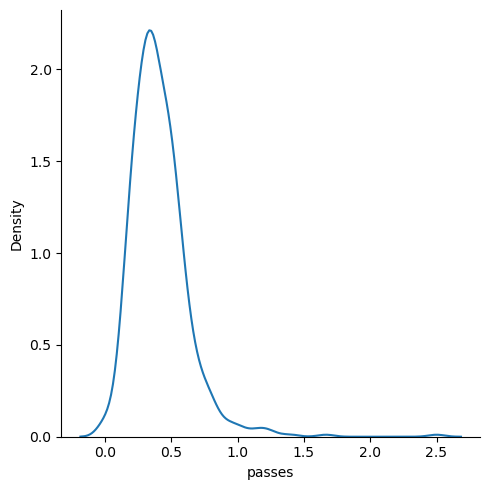

In [134]:
sns.displot(data=players_df, x='passes', kind='kde')

# 3. แสดง histogram ของการยิงประตู (shots) ของผู้เล่นทีม USA

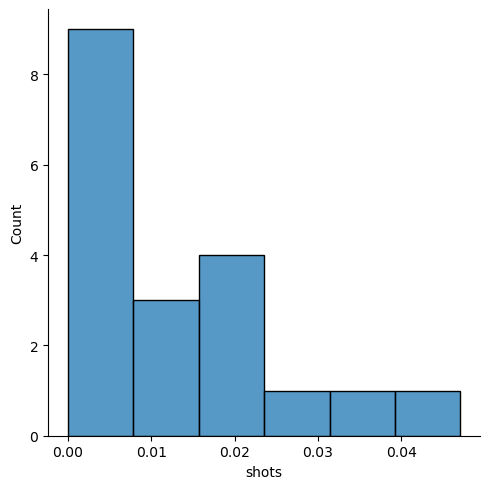

In [135]:
USA_players_df = players_df[players_df.team == 'USA']
sns.displot(data=USA_players_df, x='shots', kind='hist')

# 4. แสดง relation plot แบบ scatter plot ระหว่าง passes (แกน x) กับ shots (แกน y) ของผู้เล่นทุกคน

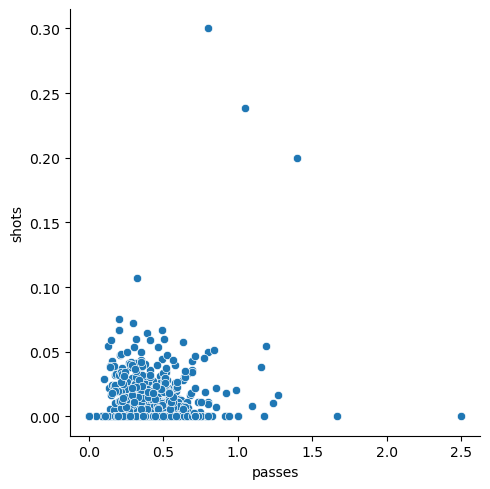

In [136]:
sns.relplot(players_df, x='passes', y='shots', kind='scatter')

# 5. แสดง relation plot แบบ scatter plot ระหว่าง passes (แกน x) กับ shots (แกน y) ของผู้เล่นที่ม Brazil, Spain, USA โดยให้แยกสีระหว่างผู้เล่นแต่ละทีม และแยกสัญลักษณ์ระหว่างตำแหน่งการเล่นด้ว

In [137]:
relation_players_df = players_df[players_df.team.isin(['Brazil', 'Spain', 'USA'])]
relation_players_df.head(5)

,surname,team,position,minutes,shots,passes,tackles,saves
66,Julio Cesar,Brazil,goalkeeper,450,0.000000,0.153333,0.000000,0.022222
521,Casillas,Spain,goalkeeper,540,0.000000,0.124074,0.000000,0.020370
591,Howard,USA,goalkeeper,390,0.000000,0.207692,0.000000,0.035897
58,Daniel Alves,Brazil,defender,310,0.035484,0.693548,0.019355,0.000000
61,Gilberto,Brazil,defender,33,0.000000,0.181818,0.121212,0.000000


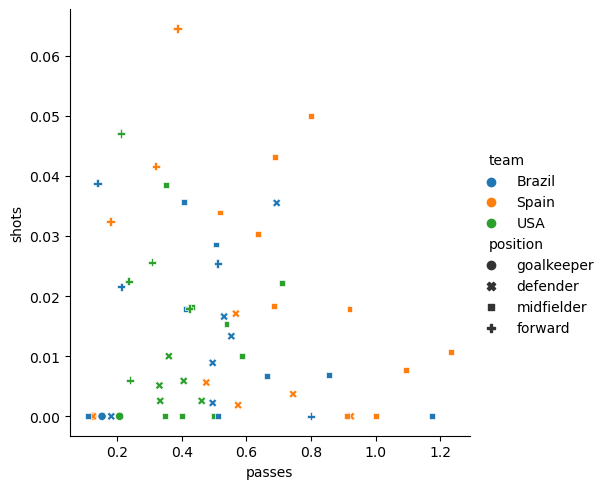

In [138]:
# hue = สี
# style = รูปแบบ
sns.relplot(data=relation_players_df, x='passes', y='shots', hue='team', kind='scatter', style='position')

# 6. แสดง relation plot แบบ scatter plot ระหว่าง tackles (แกน x) กับ shots (แกน y) ของผู้เล่นทีม Brazil, Spain, USA แต่แสดงเป็นแบบ Grid โดยให้แถวแยกตามตำแหน่งผู้เล่น คอลัมน์แยกตามทีม

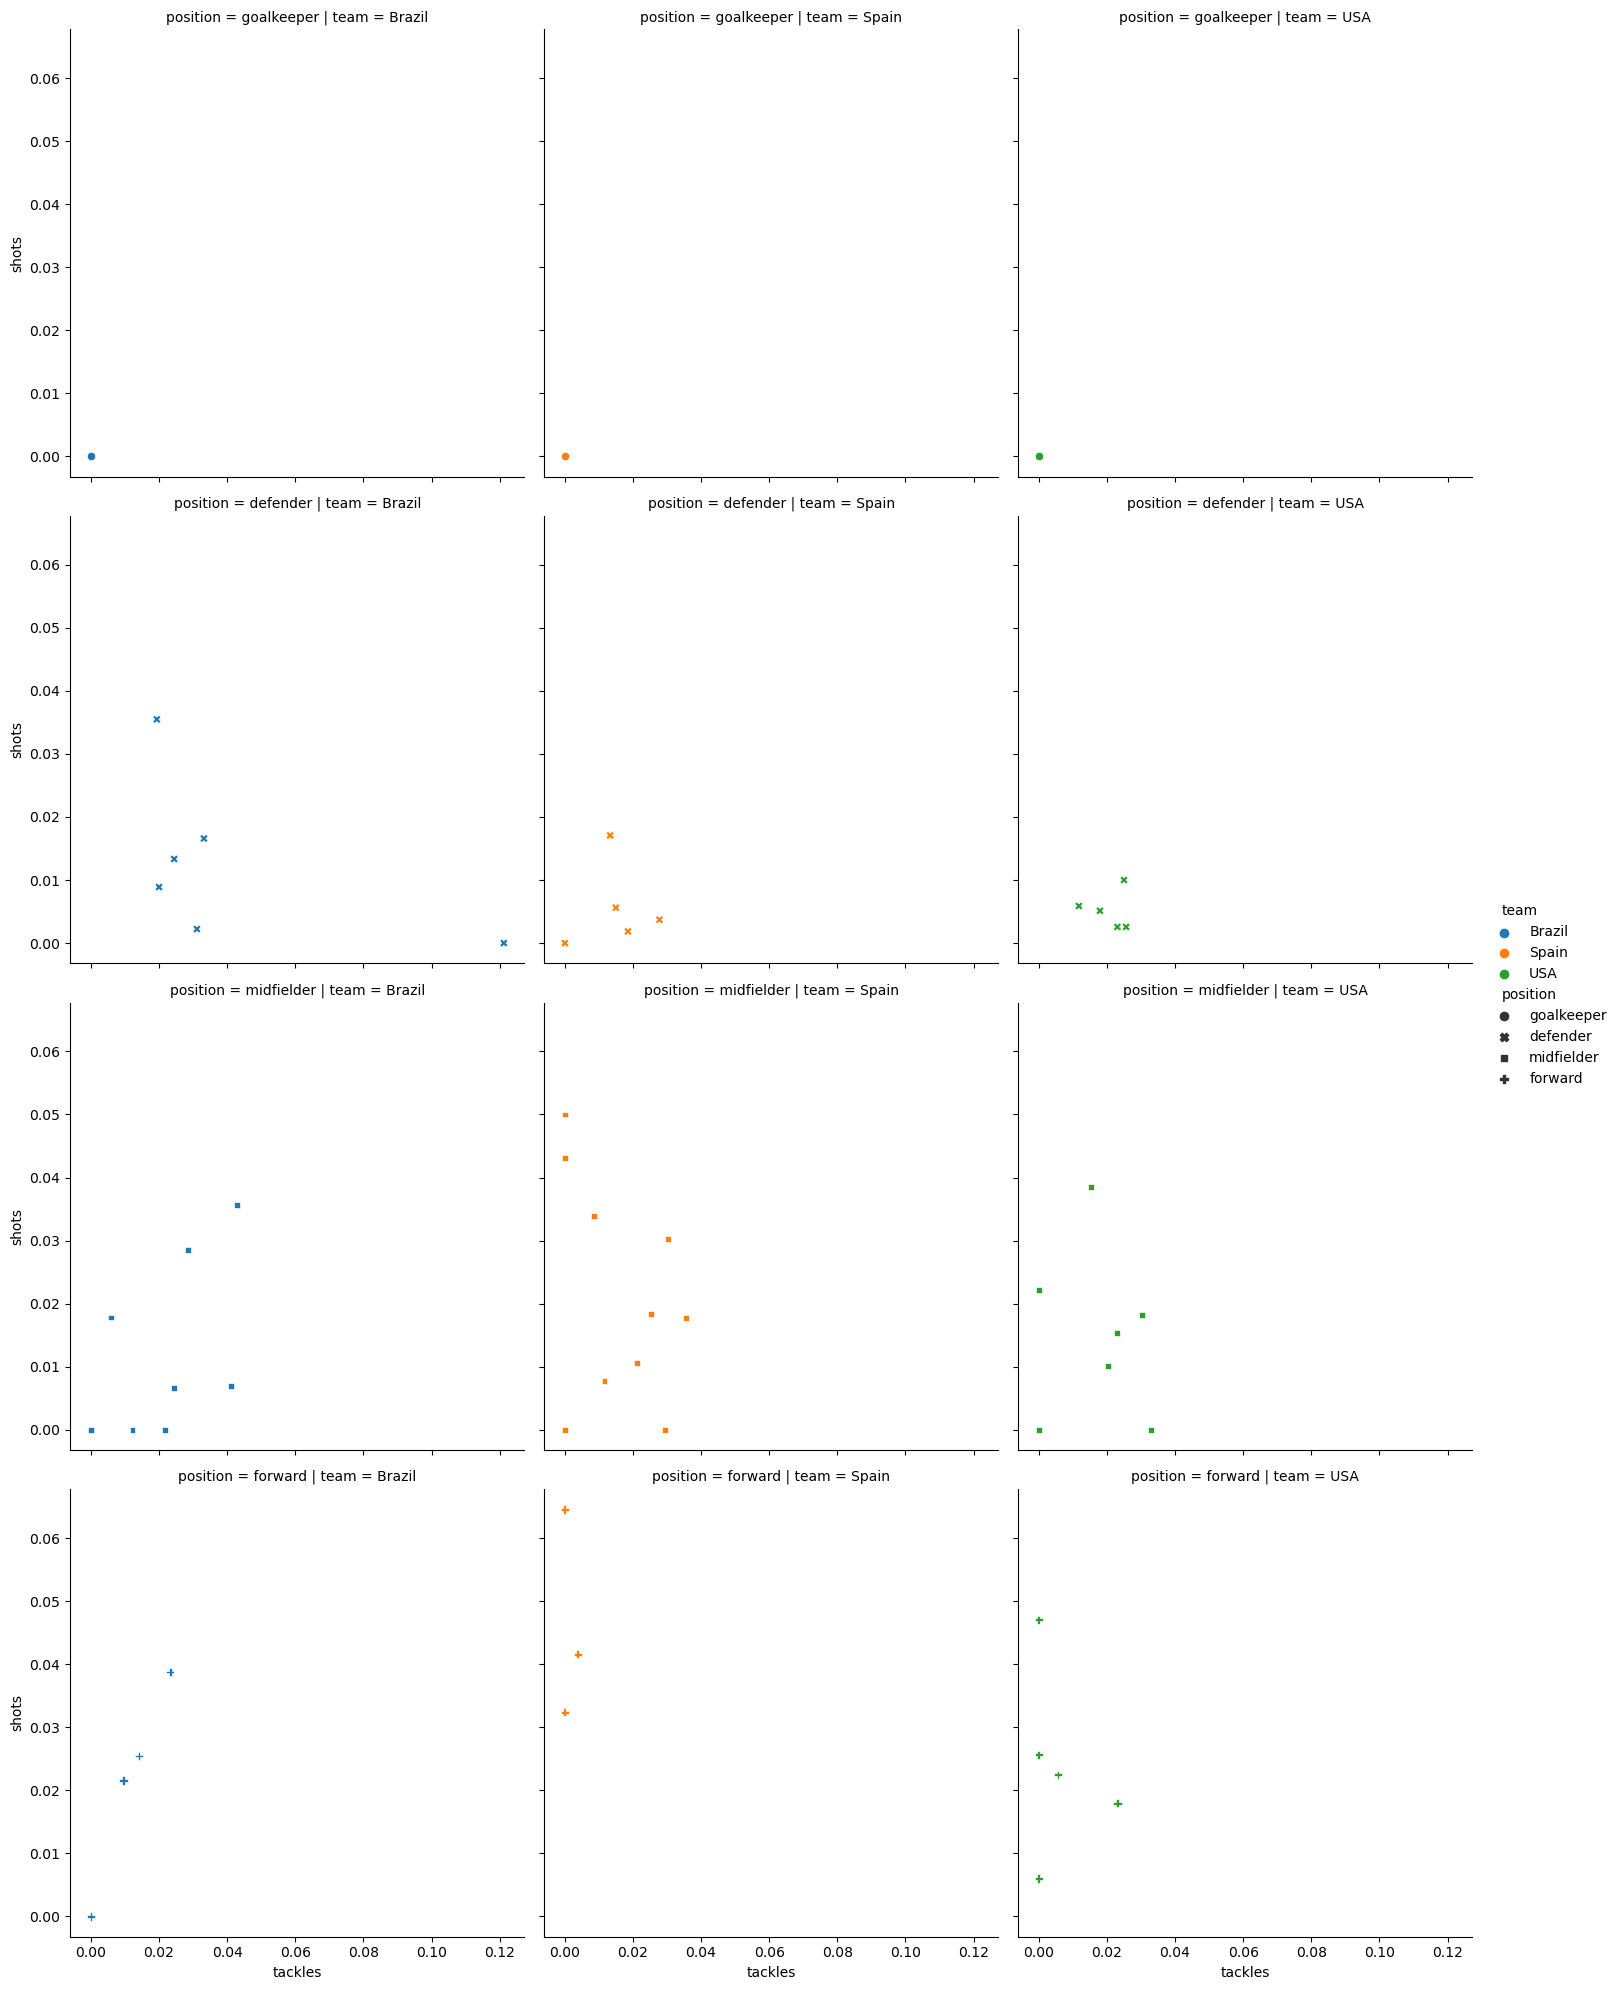

In [139]:
sns.relplot(data=relation_players_df, x='tackles', y='shots', hue='team', kind='scatter', style='position', col='team', row='position')

# 7. แสดง Boxplot ของการส่งลูกของผู้เล่นทีม Brazil, Spain, USA

<Axes: xlabel='team', ylabel='passes'>

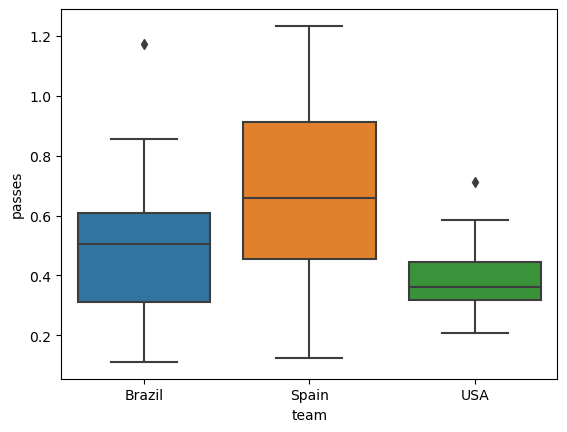

In [140]:
sns.boxplot(data=relation_players_df, x='team', y='passes')

# 8. แสดง swarm ของการส่งลูกของผู้เล่นทีม Brazil, Spain, USA แยกสีตามตำแหน่ง

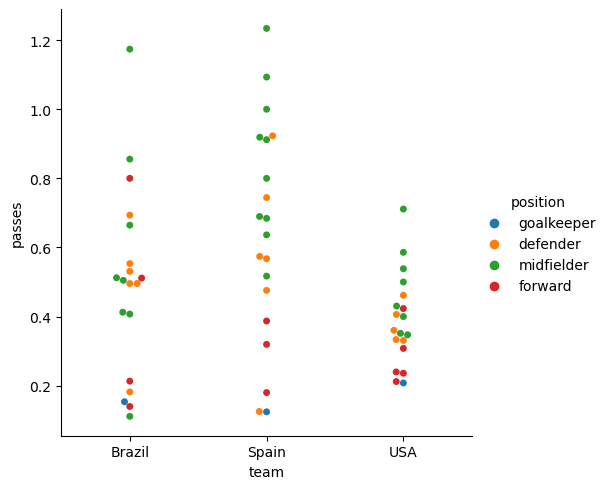

In [141]:
sns.catplot(relation_players_df, x='team', y='passes', hue='position', kind='swarm')

# 9. แสดงกราฟแท่ง (bar) ของการสกัดลูก (tackles) ของผู้เล่นทีม Brazil, Spain, USA แต่ละตำแหน่ง แยกสีตามทีม

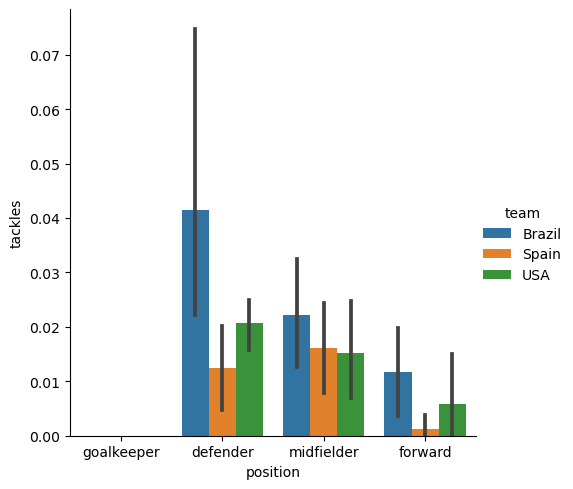

In [142]:
sns.catplot(relation_players_df, x='position', y='tackles', hue='team', kind='bar')

# 10. แสดง scatter plot ของผลรวมค่า passes (เป็นแกน x) กับผลรวมค่า shots (แกน y) ของผู้เล่นทุกคนในทีม 'Brazil','Japan','USA','Spain','Algeria','France','England','South Korea' แยกสีตามทีม

In [143]:
#  relate new data
relation_players_df2 = players_df[players_df.team.isin(['Brazil','Japan','USA','Spain','Algeria','France','England','South Korea'])]
relation_players_df2 = relation_players_df2.groupby('team').sum()[['passes','shots']]
relation_players_df2

,passes,shots
team,,
Algeria,6.798598,0.287468
Brazil,9.409405,0.257860
England,8.034676,0.258509
France,7.288387,0.299354
Japan,6.643104,0.131144
South Korea,5.916720,0.178927
Spain,12.905446,0.378533
USA,7.381349,0.249598


<Axes: xlabel='passes', ylabel='shots'>

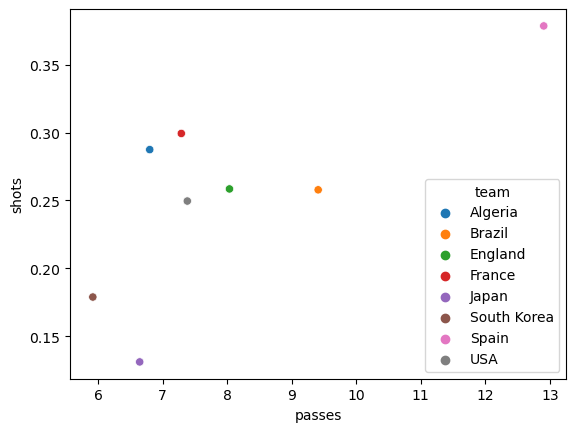

In [144]:
sns.scatterplot(data=relation_players_df2, x='passes', y='shots', hue='team')

# 11. แสดง distribution plot ของการส่งลูกของผู้เล่นทีม Brazil, Spain, USA รวมในกราฟเดียวกัน แยกสีตามทีม

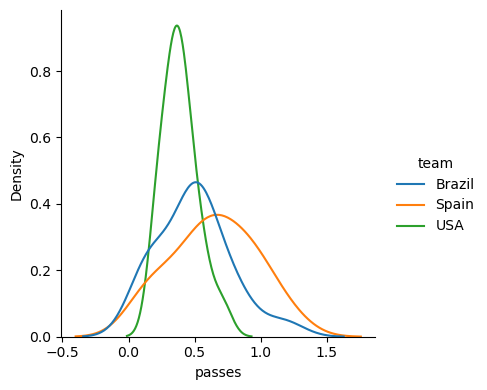

In [145]:
sns.displot(data=relation_players_df, x='passes', kind='kde', hue='team', height=4, aspect=1)